https://archive.ics.uci.edu/dataset/304/blogfeedback

Data Set Information:

This data originates from blog posts. The raw HTML-documents of the blog posts were crawled and processed.

The prediction task associated with the data is the prediction of the number of comments in the upcoming 24 hours.

In order to simulate this situation, we choose a basetime (in the past) and select the blog posts that were published at most 72 hours before the selected base date/time. Then, we calculate all the features of the selected blog posts from the information that was available at the basetime, therefore each instance corresponds to a blog post. The target is the number of comments that the blog post received in the next 24 hours relative to the base time.

In the train data, the base times were in the years 2010 and 2011. In the test data the base times were in February and March 2012.

This simulates the real-world situation in which training data from the past is available to predict events in the future.

The train data was generated from different base times that may temporally overlap.

Therefore, if you simply split the train into disjoint partitions, the underlying time intervals may overlap.

Therefore, you should use the provided, temporally disjoint train and test splits in order to ensure that the evaluation is fair.
** Attribute Information:**

1…50: Average, standard deviation, min, max and median of the Attributes 51…60 for the source of the current blog post. With source we mean the blog on which the post appeared. For example, myblog.blog.org would be the source of the post myblog.blog.org/post_2010_09_10

51: Total number of comments before basetime
52: Number of comments in the last 24 hours before the base time
53: Let T1 denote the datetime 48 hours before basetime, Let T2 denote the datetime 24 hours before basetime. This attribute is the number of comments in the time period between T1 and T2
54: Number of comments in the first 24 hours after the publication of the blog post, but before basetime
55: The difference of Attribute 52 and Attribute 53
56…60: The same features as the attributes 51…55, but features 56…60 refer to the number of links (trackbacks), while features 51…55 refer to the number of comments.
61: The length of time between the publication of the blog post and base time
62: The length of the blog post
63…262: The 200 bag of words features for 200 frequent words of the text of the blog post
263…269: binary indicator features (0 or 1) for the weekday (Monday…Sunday) of the basetime
270…276: binary indicator features (0 or 1) for the weekday (Monday…Sunday) of the date of publication of the blog post
277: Number of parent pages: we consider a blog post P as a parent of blog post B, if B is a reply (trackback) to blog post P.
278…280: Minimum, maximum, average number of comments that the parents received
281: The target: the number of comments in the next 24 hours (relative to base time)
** Relevant Papers:**

Buza, K. (2014). Feedback Prediction for Blogs. In Data Analysis, Machine Learning and Knowledge Discovery (pp. 145-152). Springer International Publishing (http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf).

In [1]:
import pandas as pd
import os

In [2]:
#Ahora creamos un df llamado test_df que sea igual a todos los archivos csv de nuestra carpeta test
filepath = 'data/test/'
filelist = os.listdir(filepath) 
test_df = pd.DataFrame()
test_raw = pd.read_csv(filepath+filelist[0], header=None)
size=filelist.__len__()

for filename in filelist :
    df = pd.read_csv(filepath+filename, header=None)
    test_df = pd.concat([test_df, df], axis=0, ignore_index=False)
    

In [3]:
#Eliminamos valores duplicados.
test_df.drop_duplicates(inplace=True)

In [4]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.589355,98.559500,0.0,713.0,2.0,14.205323,55.165180,0.0,596.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.696970,25.578740,2.0,112.0,6.0,9.484848,16.028614,0.0,72.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.666666,14.459277,0.0,76.0,0.0,2.484849,9.292512,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,192.433330,173.883790,1.0,781.0,145.0,75.233330,98.477646,0.0,372.0,31.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100,58.841270,78.075710,0.0,413.0,36.0,21.039682,46.621307,0.0,255.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
101,0.090756,0.320449,0.0,2.0,0.0,0.040336,0.213147,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_df = pd.read_csv("data/blogData_train.csv")

In [6]:
#Eliminamos duplicados de train
train_df.drop_duplicates(inplace=True)

In [7]:
train_df

,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0.1,377.0,3.0,...,0.0.229,1.0.1,0.0.230,0.0.231,0.0.232,0.0.233,0.0.234,0.0.235,0.0.236,1.0.2
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52391,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52392,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Librerias ML que podemos usar : 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Creamos nuestros train and tests
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [10]:
modelos = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100)),
    ('Support Vector Regressor', SVR()),
    ('Neural Network', MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=500))
]

In [11]:
# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/deme/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Función para calcular el RMSE (Root Mean Squared Error)
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

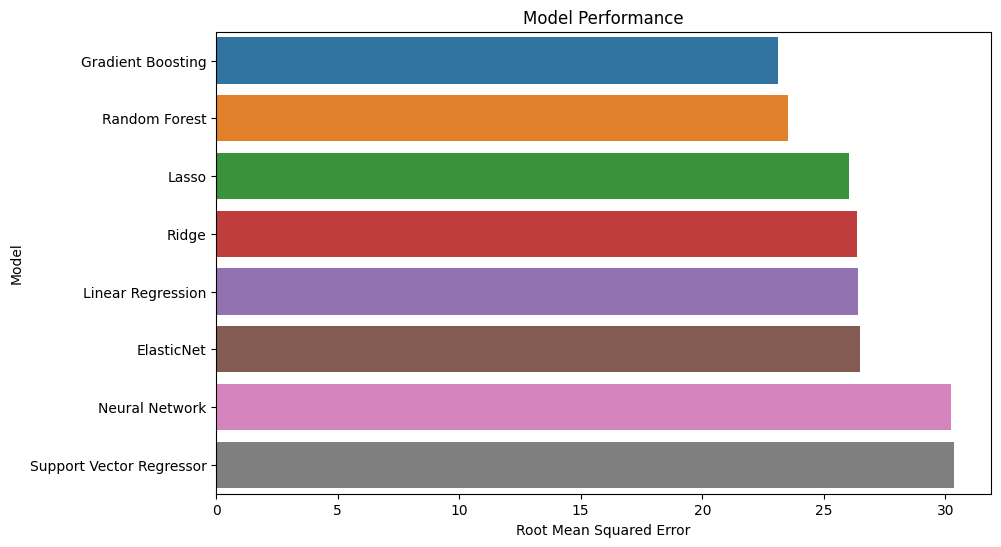

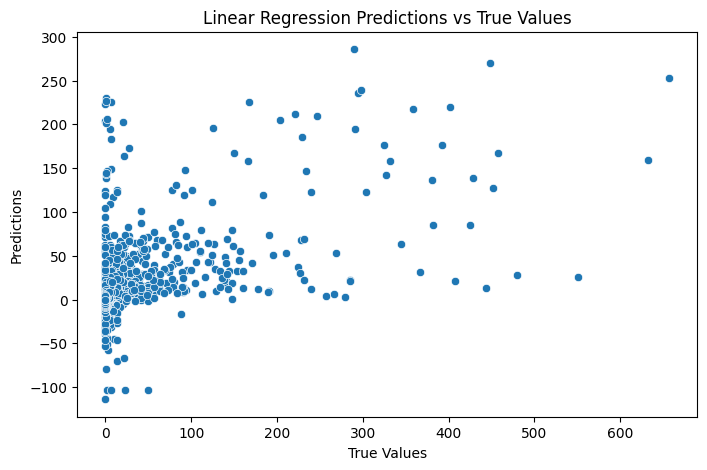

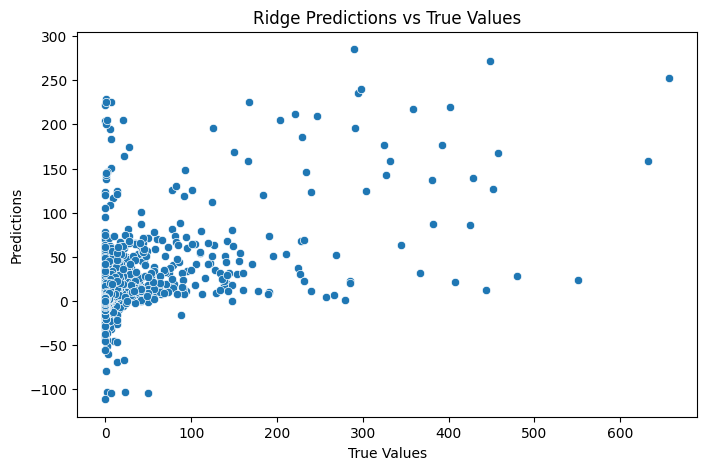

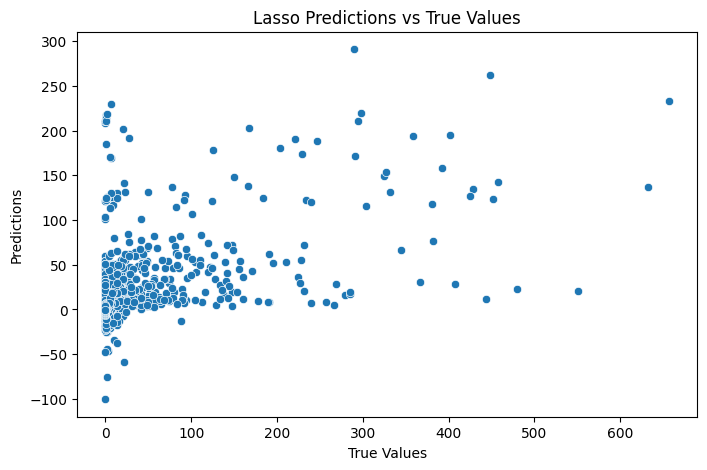

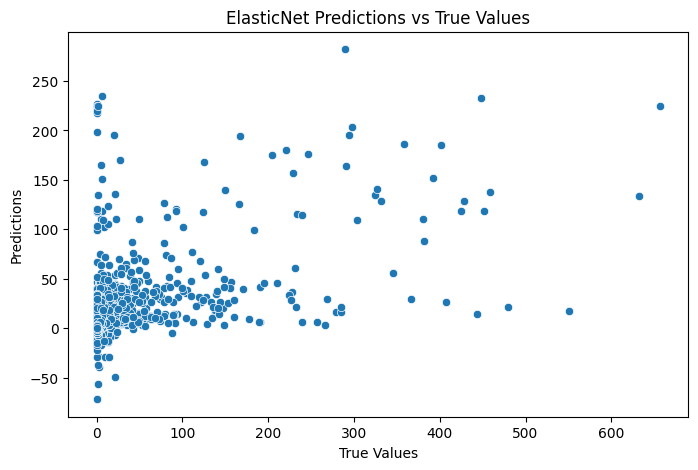

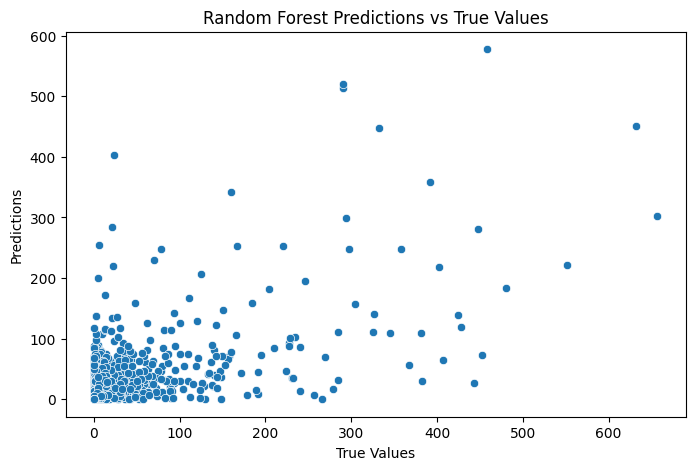

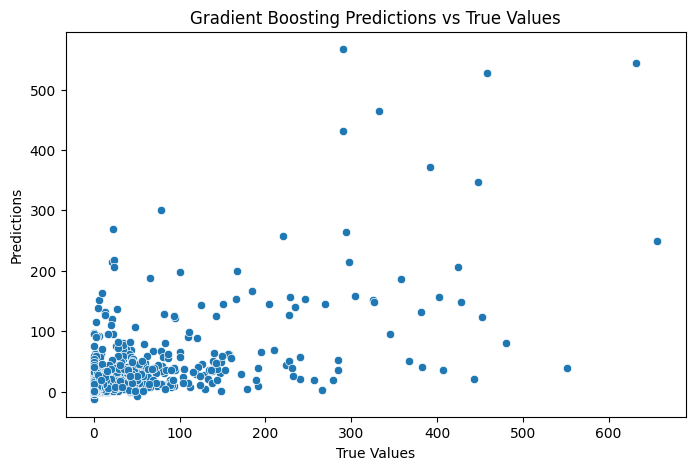

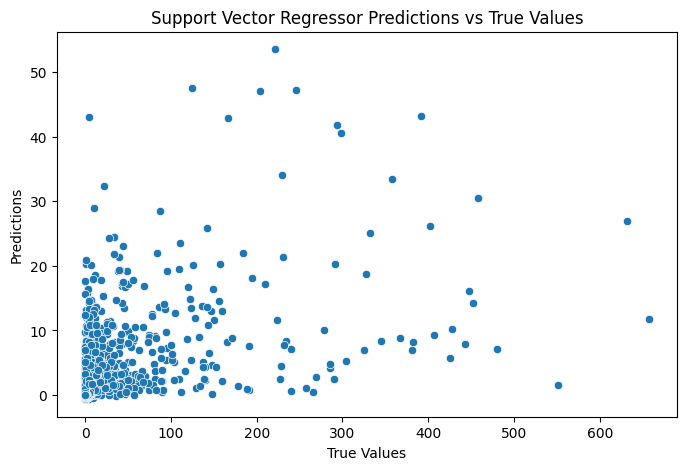

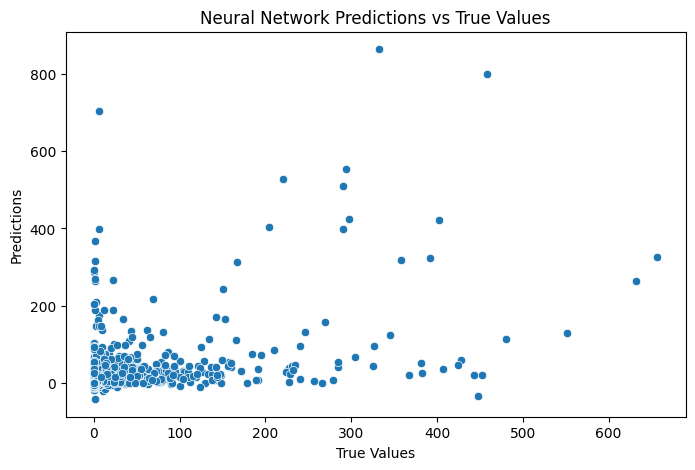

In [14]:
results = []

for name, model in modelos:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = RMSE(y_test, y_pred)
    results.append((name, rmse))

# Convertimos los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])

# Gráfica de barras de los RMSE de cada modelo
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE'))
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.title('Model Performance')
plt.show()

# Gráficos de dispersión para comparar predicciones vs valores reales
for name, model in modelos:
    y_pred = model.predict(X_test_scaled)
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name} Predictions vs True Values')
    plt.show()
